In [ ]:
#AQUÍ INTENTO ACCEDER A LOS BLOQUES, PERO NO TENGO MANERA DE EXTRAER EL TEXTO...ME INTERESAN LOS QUE HE MARCADO EN LA CAPTURA ADJUNTA EN TRELLO

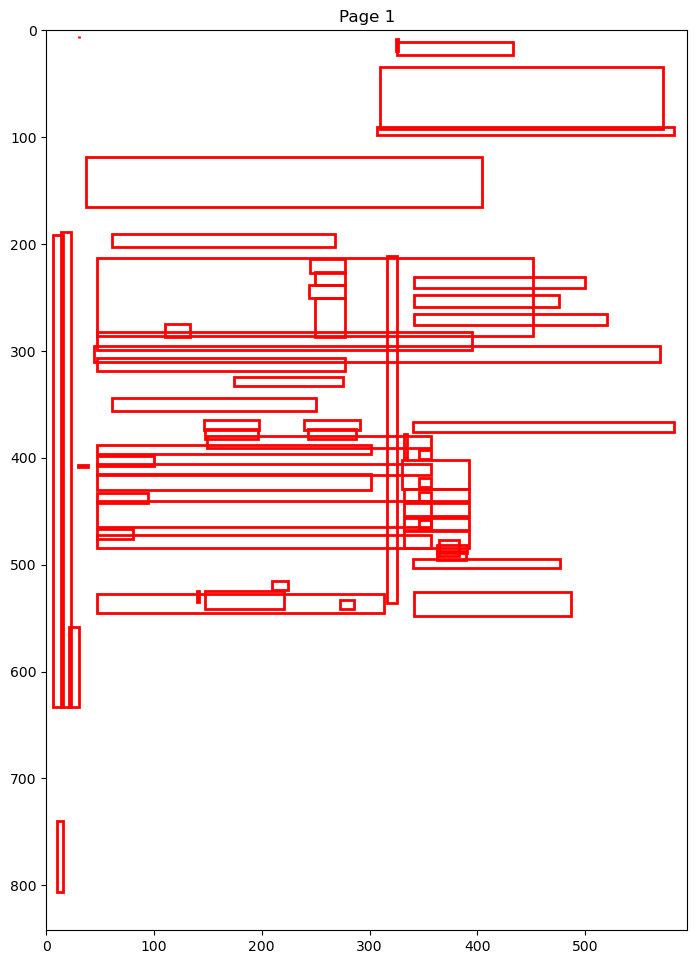

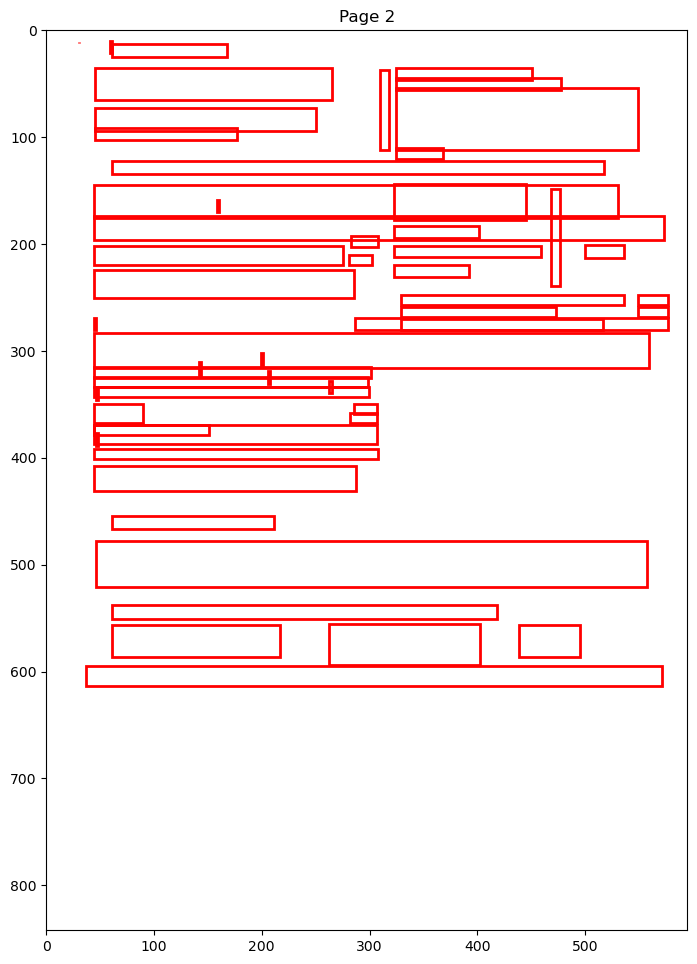

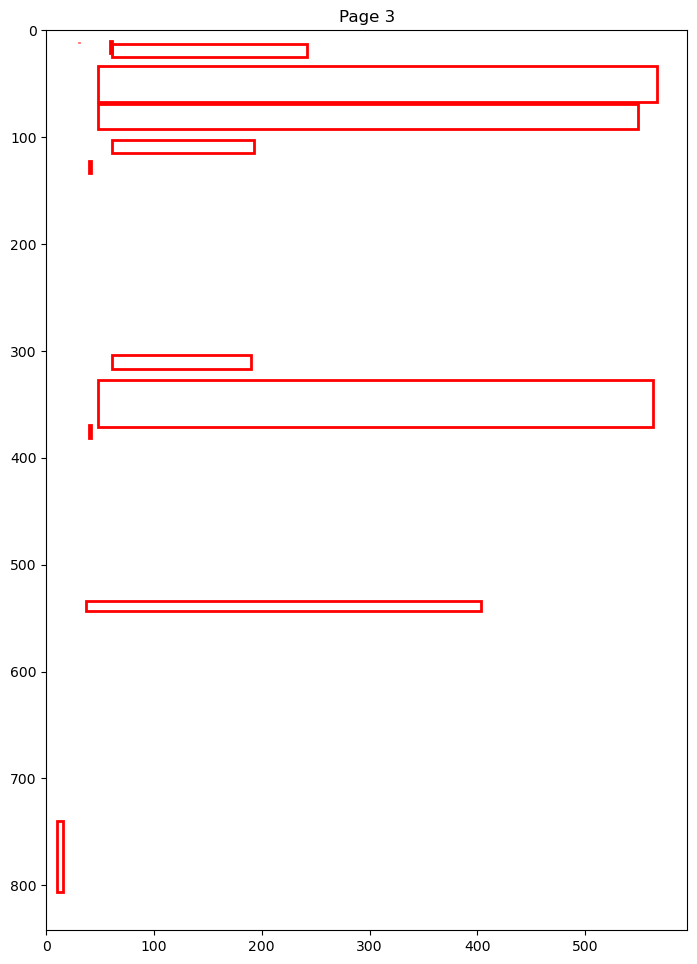

In [2]:
import fitz  # Importa PyMuPDF
import matplotlib.pyplot as plt

def visualize_pdf_blocks(pdf_path):
    doc = fitz.open(pdf_path)
    for page_num, page in enumerate(doc):
        # Configura las dimensiones de la figura para que se asemeje al tamaño de una página A4
        fig, ax = plt.subplots(figsize=(8.27, 11.69))  # Dimensiones de una página A4 en pulgadas (210mm x 297mm)
        ax.set_title(f'Page {page_num + 1}')
        ax.set_xlim(0, 595)  # Ancho de una página A4 en puntos
        ax.set_ylim(842, 0)  # Altura de una página A4 en puntos, invertido el eje y

        # Extrae los bloques de texto y dibuja sus contornos
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if block['type'] == 0:  # Solo bloques de texto
                rect = block['bbox']  # bbox = (x0, y0, x1, y1)
                text = block.get('text', '')  # Usa .get() para evitar KeyError si 'text' no está presente
                # Asegura que el rectángulo se visualice correctamente
                ax.add_patch(plt.Rectangle((rect[0], rect[1]), rect[2] - rect[0], rect[3] - rect[1], fill=False, edgecolor='red', linewidth=2))
                ax.text(rect[0], rect[1], text.strip(), fontsize=6, va='bottom', ha='left', color='blue')

        plt.show()

# Ruta al archivo PDF
pdf_path = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training\factura_0.pdf"
visualize_pdf_blocks(pdf_path)

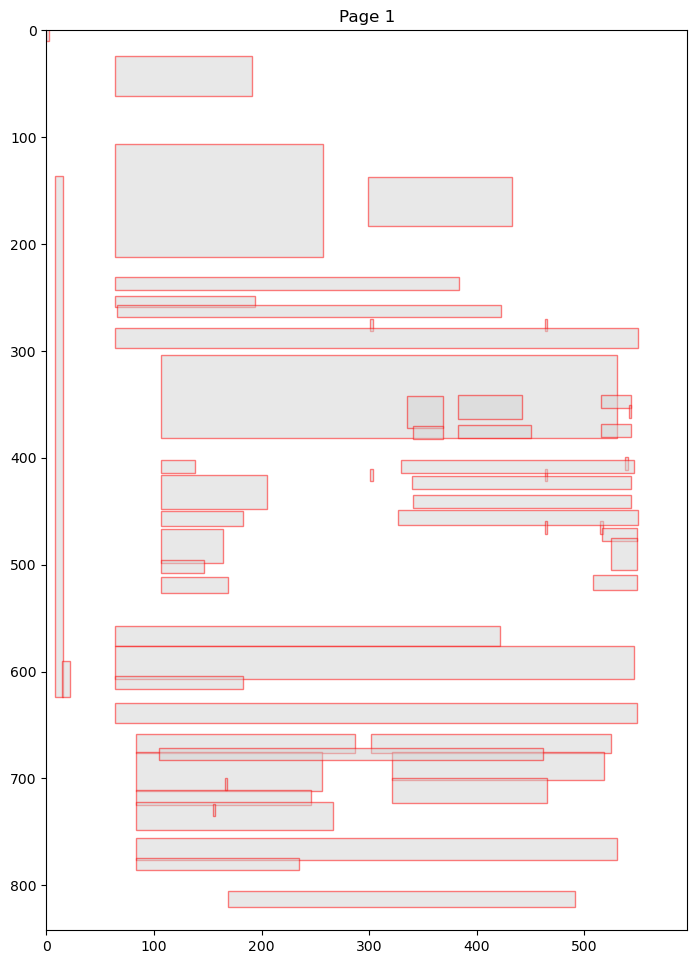

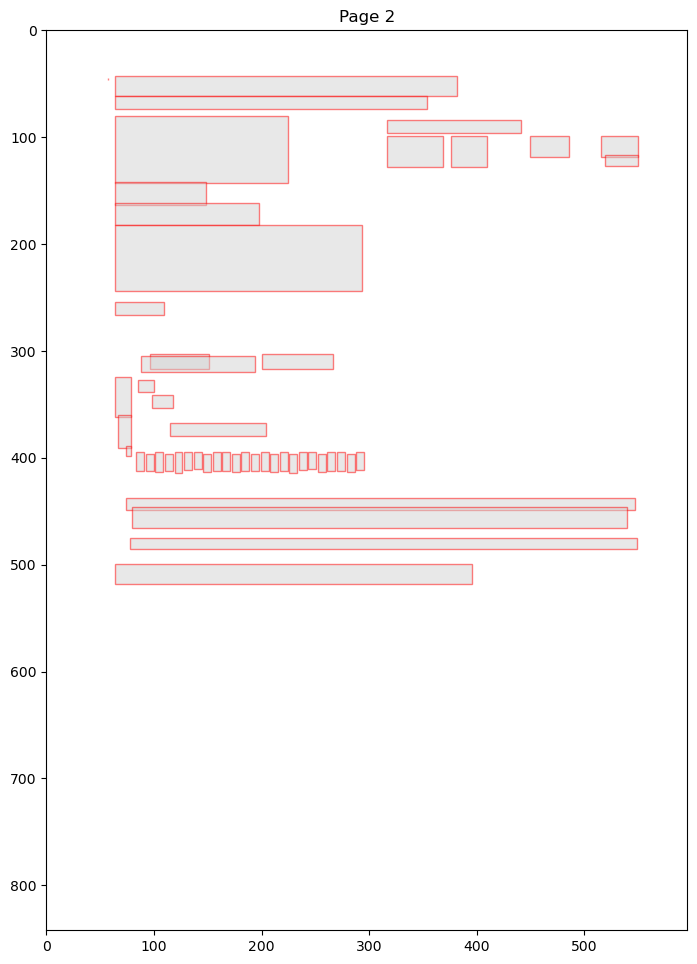

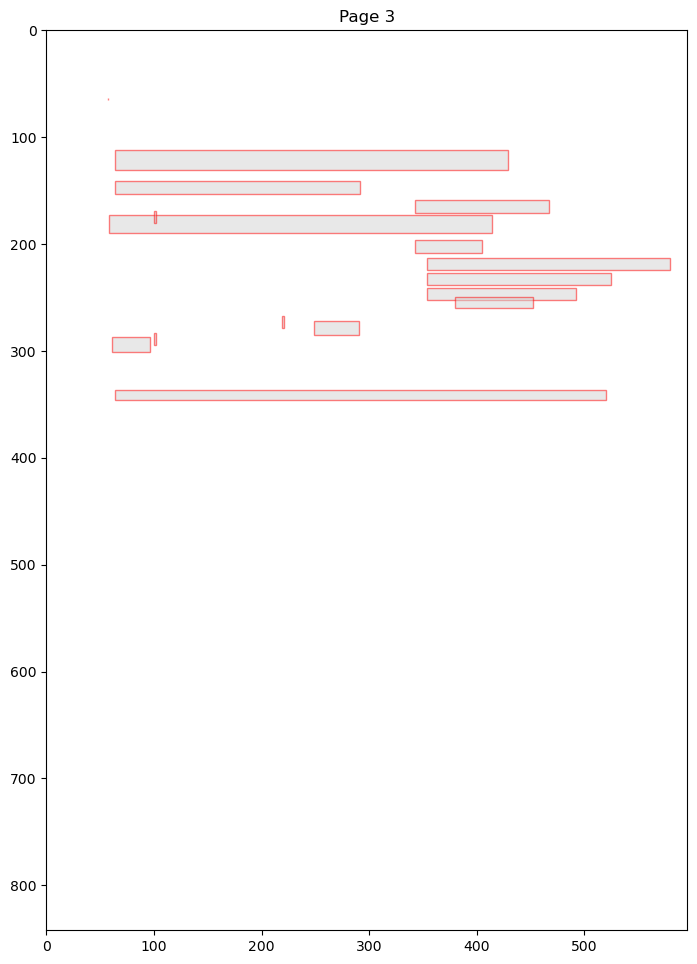

In [3]:
import fitz  # Importa PyMuPDF
import matplotlib.pyplot as plt

def visualize_pdf_blocks(pdf_path):
    doc = fitz.open(pdf_path)
    if not doc.page_count:
        print("No pages found in the document.")
        return

    for page_num, page in enumerate(doc):
        # Configura las dimensiones de la figura para que se asemeje al tamaño de una página A4
        fig, ax = plt.subplots(figsize=(8.27, 11.69))  # Dimensiones de una página A4 en pulgadas (210mm x 297mm)
        ax.set_title(f'Page {page_num + 1}')
        ax.set_xlim(0, page.rect.width)  # Usa el ancho real de la página
        ax.set_ylim(page.rect.height, 0)  # Usa la altura real de la página

        # Extrae los bloques de texto y dibuja sus contornos
        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            if block['type'] == 0:  # Solo bloques de texto
                rect = block['bbox']  # bbox = (x0, y0, x1, y1)
                text = block.get('text', '').strip()
                # Asegura que el rectángulo se visualice correctamente
                ax.add_patch(plt.Rectangle((rect[0], rect[1]), rect[2] - rect[0], rect[3] - rect[1], fill=True, edgecolor='red', facecolor='lightgray', linewidth=1, alpha=0.5))
                # Divide el texto en líneas para ajustarlo dentro del bloque
                words = text.split()
                max_line_length = max(35, (rect[2] - rect[0]) // 7)
                line_text = ""
                dy = 0
                for word in words:
                    if len(line_text + word) < max_line_length:
                        line_text += word + " "
                    else:
                        ax.text(rect[0] + 3, rect[1] + 10 + dy, line_text, fontsize=6, color='black', va='top')
                        line_text = word + " "
                        dy += 10
                if line_text:
                    ax.text(rect[0] + 3, rect[1] + 10 + dy, line_text, fontsize=6, color='black', va='top')

        plt.show()

# Ruta al archivo PDF
pdf_path = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training\factura_1.pdf"
visualize_pdf_blocks(pdf_path)


In [4]:
import fitz  # Importa PyMuPDF

def check_pdf_extraction(pdf_path):
    doc = fitz.open(pdf_path)
    if not doc.page_count:
        print("No pages found in the document.")
        return
    
    for page_num, page in enumerate(doc):
        print(f"--- Page {page_num + 1} ---")
        blocks = page.get_text("dict")["blocks"]
        if not blocks:
            print("No text blocks found on this page.")
        else:
            for i, block in enumerate(blocks):
                print(f"Block {i+1}:")
                print(f"  Bounding Box: {block['bbox']}")
                # Utiliza el método .get para acceder a 'text', proporcionando una cadena vacía como valor por defecto
                text = block.get('text', '')
                print(f"  Text: {text.strip()}")

# Ruta al archivo PDF
pdf_path = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training\factura_0.pdf"
check_pdf_extraction(pdf_path)

--- Page 1 ---
Block 1:
  Bounding Box: (36.79999923706055, 68.10196685791016, 174.65000915527344, 104.0899658203125)
  Text: 
Block 2:
  Bounding Box: (325.8699951171875, 11.009953498840332, 433.64202880859375, 23.4029541015625)
  Text: 
Block 3:
  Bounding Box: (309.30999755859375, 34.0049934387207, 572.8619995117188, 92.7109603881836)
  Text: 
Block 4:
  Bounding Box: (307.1499938964844, 90.28999328613281, 582.22802734375, 98.53398895263672)
  Text: 
Block 5:
  Bounding Box: (36.720001220703125, 118.84999084472656, 404.66510009765625, 165.44825744628906)
  Text: 
Block 6:
  Bounding Box: (46.68000030517578, 213.2569580078125, 451.4951171875, 286.5409851074219)
  Text: 
Block 7:
  Bounding Box: (244.3699951171875, 214.38499450683594, 276.87200927734375, 226.75099182128906)
  Text: 
Block 8:
  Bounding Box: (249.41000366210938, 226.26499938964844, 276.87200927734375, 238.63099670410156)
  Text: 
Block 9:
  Bounding Box: (243.41000366210938, 238.26499938964844, 276.87200927734375, 250.

In [5]:
import fitz  # Importa la biblioteca PyMuPDF

def extract_text_from_pdf_simple(pdf_path):
    doc = fitz.open(pdf_path)
    for page_num, page in enumerate(doc):
        text = page.get_text()
        if text.strip():  # Verificar que el texto no esté vacío
            print(f"--- Page {page_num + 1} ---\n{text}\n")

# Ruta al archivo PDF
pdf_path = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training\factura_0.pdf"
extract_text_from_pdf_simple(pdf_path)

--- Page 1 ---
DATOS DE LA FACTURA 
Nº factura: SV5043664894 
Referencia: 591313314378/6522 
Fecha emisión factura: 27/09/2018 
Periodo de Facturación: del 26/08/2018 a 25/09/2018 (30 días) 
Fecha de cargo: 30 de septiembre de 2018 
.................................................................................................................................................................... 
IBERDESA COMERCIALIZADORA SOCIEDAD LIMITADA. 
CIF B90393497. 
CRT.SEVILLA-MADRID, KM 524, CAMINO DE LA PASTORA S/N 41410 - CARMONA 
Conrado Daniel Iglesias  
Calle la Solana 
22394 La Fueva  
Huesca 
Forma de pago: Domiciliada 
Potencia 
Energía 
Descuentos 
Otros 
Impuestos 
IGIC reducido 
16,80 € 
0,00 € 
-X,XX € 
0,80 € 
0,86 € 
1,24 € 
Fecha de cargo: 30 de septiembre de 2018 
IBAN: ES31873903585096496***** 
Cod.Mandato: E88656958265427260292185691 
( 7%) 
Versión: 4779 
IGIC normal ( 10%) 
0,08 € 
.............................................................................................

In [2]:
#INTENTO EXTRAER EL TEXTO DE UN BLOQUE, PERO NO PILLA NADA...

import fitz  # Importa la biblioteca PyMuPDF

def extract_single_block_from_pdf(pdf_path, page_number=0, block_number=1):
    doc = fitz.open(pdf_path)
    if len(doc) > page_number:
        page = doc[page_number]
        blocks = page.get_text("dict")["blocks"]
        if len(blocks) >= block_number:
            block = blocks[block_number - 1]  # block_number es 1-indexado
            if block['type'] == 0:  # Verificar si el bloque es de tipo texto
                text = block.get('text', '').strip()
                bbox = block['bbox']  # La caja delimitadora del bloque de texto
                if text:  # Verificar que el texto no esté vacío
                    print(f"--- Page {page_number + 1}, Block {block_number} ---")
                    print(f"  Bounding Box: {bbox}")
                    print(f"  Text: {text}\n")
                else:
                    print("El bloque seleccionado no contiene texto.")
            else:
                print("El bloque seleccionado no es un bloque de texto.")
        else:
            print(f"No hay suficientes bloques en la página {page_number + 1} para mostrar el bloque número {block_number}.")
    else:
        print(f"No hay suficiente número de páginas en el documento para mostrar la página {page_number + 1}.")

# Ruta al archivo PDF
pdf_path = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training\factura_0.pdf"
extract_single_block_from_pdf(pdf_path, page_number=1, block_number=1)

El bloque seleccionado no es un bloque de texto.


In [7]:
#INTENTO CONOCER LA POSICIÓN DE LOS BLOQUES QUE ME INTERESAN, PERO COMO NO SÉ QUÉ NÚMERO DE BLOQUE ES CADA UNO...NO ME CUADRA EL TEXTO CON EL BLOQUE POR LO QUE HE PODIDO VER, HAY QUE REVISARLO

import fitz  # Importa la biblioteca PyMuPDF
import pandas as pd
from IPython.display import display

def extract_text_details(pdf_path):
    doc = fitz.open(pdf_path)
    block_dict = {}
    page_num = 1

    # Iterar sobre todas las páginas del documento
    for page in doc:
        file_dict = page.get_text('dict')  # Obtener el diccionario de la página
        block = file_dict['blocks']  # Obtener la información de los bloques
        block_dict[page_num] = block  # Almacenar en el diccionario de bloques
        page_num += 1  # Incrementar el número de página

    # Preparar un DataFrame para almacenar información de los bloques de texto
    text_blocks = pd.DataFrame(columns=['block_num', 'xmin', 'ymin', 'xmax', 'ymax', 'text'])
    rows = []

    # Recorrer el diccionario de bloques para extraer información de bloques de texto
    for page_num, blocks in block_dict.items():
        for block_num, block in enumerate(blocks, start=1):
            if block['type'] == 0:  # Solo interesados en bloques de texto
                for line in block['lines']:
                    for span in line['spans']:
                        xmin, ymin, xmax, ymax = span['bbox']
                        text = span['text']
                        rows.append((block_num, xmin, ymin, xmax, ymax, text))

    if rows:
        text_blocks = pd.DataFrame(rows, columns=['block_num', 'xmin', 'ymin', 'xmax', 'ymax', 'text'])
    return text_blocks

# Ruta al archivo PDF
pdf_path = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training\factura_0.pdf"
text_blocks_df = extract_text_details(pdf_path)

# Configuración para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame con scroll horizontal
display(text_blocks_df)

,block_num,xmin,ymin,xmax,ymax,text
0,2,325.869995,11.009953,431.010895,23.402954,DATOS DE LA FACTURA
1,2,431.140015,11.009953,433.642029,23.402954,
2,3,309.309998,34.004993,420.206573,46.370995,Nº factura: SV5043664894
3,3,420.459991,34.004993,422.962006,46.370995,
4,3,309.309998,45.524952,443.002014,57.890953,Referencia: 591313314378/6522
5,3,309.309998,58.244984,407.047821,70.610985,Fecha emisión factura:
6,3,406.869995,58.289982,453.953491,70.682983,27/09/2018
7,3,454.179993,58.289982,456.682007,70.682983,
8,3,309.309998,69.569954,570.447021,81.962952,Periodo de Facturación: del 26/08/2018 a 25/09...
9,3,570.359985,69.569954,572.862000,81.962952,


In [8]:
import os
import fitz  # Importa la biblioteca PyMuPDF
import pandas as pd

# Función para extraer detalles de texto de un PDF
def extract_text_details(pdf_path):
    doc = fitz.open(pdf_path)
    block_dict = {}
    page_num = 1

    # Iterar sobre todas las páginas del documento
    for page in doc:
        file_dict = page.get_text('dict')  # Obtener el diccionario de la página
        block = file_dict['blocks']  # Obtener la información de los bloques
        block_dict[page_num] = block  # Almacenar en el diccionario de bloques
        page_num += 1  # Incrementar el número de página

    # Contar el número total de bloques de texto en el documento
    total_blocks = sum(len(blocks) for blocks in block_dict.values())
    return total_blocks

# Directorio que contiene las facturas en PDF
pdf_directory = r"C:\Users\AdmInfo\Downloads\Hack a Boss\Repte\training"

# Diccionario para almacenar el recuento de bloques de texto y las facturas asociadas
blocks_count_dict = {}

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)
        # Extraer detalles de texto del PDF y contar el número de bloques de texto
        blocks_count = extract_text_details(pdf_path)
        # Agregar el recuento al diccionario y registrar la factura asociada
        if blocks_count in blocks_count_dict:
            blocks_count_dict[blocks_count].append(filename)
        else:
            blocks_count_dict[blocks_count] = [filename]

# Crear un DataFrame a partir del diccionario
data = []
for count, invoices in blocks_count_dict.items():
    for invoice in invoices:
        data.append({'Cantidad de bloques': count, 'Número de facturas': len(invoices), 'Factura': invoice})

df = pd.DataFrame(data)

# Ordenar el DataFrame por la cantidad de bloques
df = df.sort_values(by='Cantidad de bloques')

# Mostrar el DataFrame sin el índice de la primera columna
print(df.to_string(index=False))

 Cantidad de bloques  Número de facturas         Factura
                 131                   5 factura_937.pdf
                 131                   5 factura_776.pdf
                 131                   5 factura_527.pdf
                 131                   5 factura_426.pdf
                 131                   5 factura_221.pdf
                 132                  48 factura_675.pdf
                 132                  48 factura_409.pdf
                 132                  48 factura_425.pdf
                 132                  48  factura_44.pdf
                 132                  48 factura_465.pdf
                 132                  48 factura_472.pdf
                 132                  48 factura_518.pdf
                 132                  48  factura_54.pdf
                 132                  48 factura_591.pdf
                 132                  48 factura_605.pdf
                 132                  48 factura_637.pdf
                 132           

In [9]:
import fitz

# Abre el archivo PDF
pdf_file = "factura_0.pdf"
pdf_document = fitz.open(pdf_file)

# Itera sobre cada bloque del PDF
for block_number in range(len(pdf_document)):
    # Accede al bloque actual
    current_block = pdf_document[block_number]
    
    # Extrae el texto del bloque actual
    block_text = current_block.get_text()
    
    # Muestra el número de bloque y el texto de manera tabulada
    print(f"Bloque {block_number + 1}:\n")
    print(block_text)
    print("\n---------------------------------------------\n")

# Cierra el documento
pdf_document.close()

Bloque 1:

DATOS DE LA FACTURA 
Nº factura: SV5043664894 
Referencia: 591313314378/6522 
Fecha emisión factura: 27/09/2018 
Periodo de Facturación: del 26/08/2018 a 25/09/2018 (30 días) 
Fecha de cargo: 30 de septiembre de 2018 
.................................................................................................................................................................... 
IBERDESA COMERCIALIZADORA SOCIEDAD LIMITADA. 
CIF B90393497. 
CRT.SEVILLA-MADRID, KM 524, CAMINO DE LA PASTORA S/N 41410 - CARMONA 
Conrado Daniel Iglesias  
Calle la Solana 
22394 La Fueva  
Huesca 
Forma de pago: Domiciliada 
Potencia 
Energía 
Descuentos 
Otros 
Impuestos 
IGIC reducido 
16,80 € 
0,00 € 
-X,XX € 
0,80 € 
0,86 € 
1,24 € 
Fecha de cargo: 30 de septiembre de 2018 
IBAN: ES31873903585096496***** 
Cod.Mandato: E88656958265427260292185691 
( 7%) 
Versión: 4779 
IGIC normal ( 10%) 
0,08 € 
.................................................................................................

In [ ]:
import fitz

# Función para buscar texto en el documento PDF
def buscar_texto(pdf_document, texto_buscado):
    for block_number in range(len(pdf_document)):
        # Accede al bloque actual
        current_block = pdf_document[block_number]
        
        # Extrae el texto del bloque actual
        block_text = current_block.get_text()
        
        # Si el texto buscado está en el bloque actual
        if texto_buscado in block_text:
            print(f"Texto encontrado en el bloque {block_number + 1}")
            print("---------------------------------------------")
            print(block_text)
            print("---------------------------------------------")

# Abre el archivo PDF
pdf_file = "factura_0.pdf"
pdf_document = fitz.open(pdf_file)

# Texto a buscar
texto_buscado = "inscr"

# Realiza la búsqueda
buscar_texto(pdf_document, texto_buscado)

# Cierra el documento
pdf_document.close()


In [ ]:
import fitz

# Abre el archivo PDF
pdf_file = "factura_0.pdf"
pdf_document = fitz.open(pdf_file)

# Página del PDF que deseas procesar
page_number = 0

# Obtiene la rotación de la página
rotation = int(pdf_document[page_number].rotation)

# Detecta el texto en la página
text_instances = pdf_document[page_number].search_for("IBERDESA")

# Corrige la posición de los rectángulos de texto para la rotación inversa
if rotation == 90:
    text_instances = [(r[1], pdf_document[page_number].height - r[0], r[3], pdf_document[page_number].height - r[2]) for r in text_instances]
elif rotation == 270:
    text_instances = [(pdf_document[page_number].width - r[1], r[0], pdf_document[page_number].width - r[3], r[2]) for r in text_instances]

# Extrae el texto en los rectángulos corregidos
for r in text_instances:
    text = pdf_document[page_number].get_text("text", clip=r)
    print(text)

# Cierra el documento
pdf_document.close()


In [1]:
import pdfplumber

# Ruta al archivo PDF
path_to_pdf = 'factura_4.pdf'

# Abrir el archivo PDF
with pdfplumber.open(path_to_pdf) as pdf:
    # Suponiendo que el texto que necesitas está en la primera página
    first_page = pdf.pages[0]
    # Extraer todo el texto de la página
    text = first_page.extract_text()

# Buscar y extraer el bloque de texto específico
start = text.find("ELECTRICA MUNICIPAL DE SANTA COLOMA DE QUERALT")
if start != -1:
    # Extraer hasta el final del bloque de texto relevante
    end = text.find("Tarragona", start) + len("Tarragona")
    specific_text = text[start:end]
    print(specific_text)
else:
    print("Texto específico no encontrado.")
